In [ ]:
!pip install tqdm
!pip install tensorflow
!pip install tensorflow numpy matplotlib
!pip install tensorflow tensorflow-hub numpy matplotlib

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


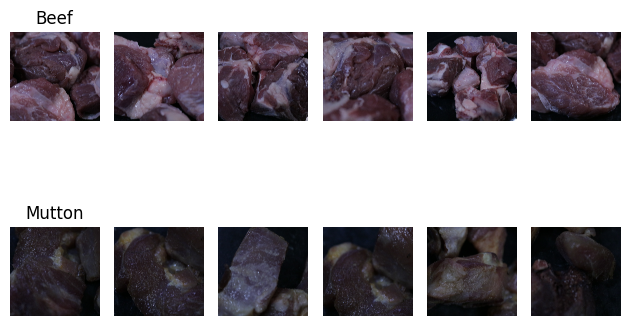

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your dataset directory
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Dataset/Meat Classification"

# Define the image file extension as '.JPG'
image_extension = '.JPG'

# Define the number of sample images to visualize per class
num_samples_per_class = 6

# Create a list to store sample image paths
sample_image_paths = []

# Get a list of class folders
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define the number of columns for subplots
num_columns = num_samples_per_class

# Iterate through class folders
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.endswith(image_extension)]

    if not image_files:
        continue  # Skip empty folders

    # Randomly select 6 images for visualization
    sample_images = random.sample(image_files, min(num_samples_per_class, len(image_files)))

    sample_image_paths.extend([os.path.join(class_path, img) for img in sample_images])

# Calculate the number of rows required
num_rows = (len(sample_image_paths) + num_columns - 1) // num_columns

# Visualize sample images with class names
for i, image_path in enumerate(sample_image_paths, start=1):
    plt.subplot(num_rows, num_columns, i)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

    if i % num_columns == 1:
        plt.title(class_folders[i // num_columns])

plt.tight_layout()
plt.show()


Found 414 images belonging to 2 classes.
Number of classes: 2
Class labels: {'Beef': 0, 'Mutton': 1}
Number of images per class:
Beef: 201 images
Mutton: 213 images


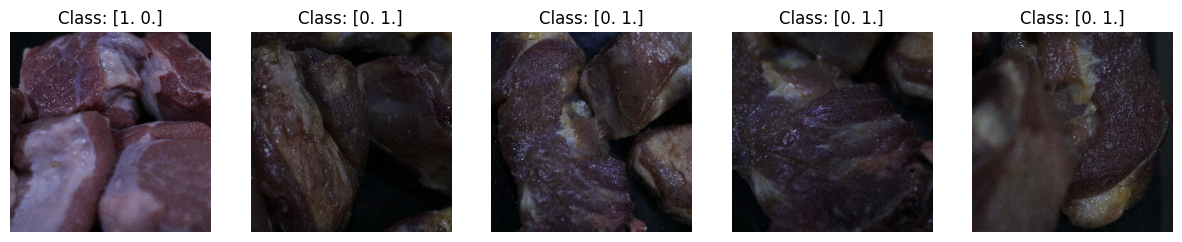

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Dataset/Meat Classification"

# Create an ImageDataGenerator for loading and preprocessing images
image_data_generator = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images from a directory
image_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(256, 256),  # Set your desired target size
    batch_size=32,           # Set your desired batch size
    class_mode='categorical'  # Set the class mode based on your dataset
)

# Display some details about the loaded dataset
print("Number of classes:", len(image_dataset.class_indices))
print("Class labels:", image_dataset.class_indices)

# Count the number of images per class
class_image_counts = {class_label: len(os.listdir(os.path.join(dataset_path, class_label)))
                      for class_label in os.listdir(dataset_path)}
print("Number of images per class:")
for class_label, count in class_image_counts.items():
    print(f"{class_label}: {count} images")

# Display a few sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    image, label = image_dataset.next()
    axes[i].imshow(image[0])
    axes[i].axis('off')
    axes[i].set_title(f"Class: {label[0]}")

plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Dataset/Meat Classification Picrures"
output_folder = "/content/drive/MyDrive/Meat Classification Picrures Split dataset"

# Create output folders for train and test sets
train_folder = os.path.join(output_folder, "train")
test_folder = os.path.join(output_folder, "test")
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Loop through each class folder
for class_name in tqdm(os.listdir(dataset_path), desc="Processing classes"):
    class_path = os.path.join(dataset_path, class_name)

    # Skip non-directory entries
    if not os.path.isdir(class_path):
        continue

    # Get a list of all images in the class folder with .jpg or .JPG extension
    images = [img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))]

    # Print the list of images for each class
    print(f"Class '{class_name}' has {len(images)} image(s): {images}")

    # Check if there are any images for the current class
    if not images:
        print(f"Skipping class '{class_name}' as it has no images.")
        continue

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Save images to the corresponding train and test folders
    for img in train_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(train_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

    for img in test_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(test_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

print("Dataset splitting and copying completed.")


Processing classes:   0%|          | 0/2 [00:00<?, ?it/s]

Class 'Beef' has 201 image(s): ['IMG_4843.JPG', 'IMG_4845.JPG', 'IMG_4842.JPG', 'IMG_4847.JPG', 'IMG_4846.JPG', 'IMG_4840.JPG', 'IMG_4844.JPG', 'IMG_4834.JPG', 'IMG_4841.JPG', 'IMG_4835.JPG', 'IMG_4838.JPG', 'IMG_4836.JPG', 'IMG_4815.JPG', 'IMG_4818.JPG', 'IMG_4833.JPG', 'IMG_4839.JPG', 'IMG_4813.JPG', 'IMG_4832.JPG', 'IMG_4817.JPG', 'IMG_4819.JPG', 'IMG_4820.JPG', 'IMG_4830.JPG', 'IMG_4826.JPG', 'IMG_4825.JPG', 'IMG_4823.JPG', 'IMG_4821.JPG', 'IMG_4831.JPG', 'IMG_4816.JPG', 'IMG_4824.JPG', 'IMG_4837.JPG', 'IMG_4827.JPG', 'IMG_4829.JPG', 'IMG_4828.JPG', 'IMG_4809.JPG', 'IMG_4798.JPG', 'IMG_4802.JPG', 'IMG_4799.JPG', 'IMG_4806.JPG', 'IMG_4812.JPG', 'IMG_4822.JPG', 'IMG_4814.JPG', 'IMG_4805.JPG', 'IMG_4794.JPG', 'IMG_4801.JPG', 'IMG_4797.JPG', 'IMG_4807.JPG', 'IMG_4792.JPG', 'IMG_4796.JPG', 'IMG_4804.JPG', 'IMG_4811.JPG', 'IMG_4803.JPG', 'IMG_4808.JPG', 'IMG_4810.JPG', 'IMG_4800.JPG', 'IMG_4780.JPG', 'IMG_4788.JPG', 'IMG_4790.JPG', 'IMG_4775.JPG', 'IMG_4781.JPG', 'IMG_4789.JPG', 'IMG_479

Processing classes:  50%|█████     | 1/2 [00:13<00:13, 13.94s/it]

Class 'Mutton' has 213 image(s): ['IMG_6775.JPG', 'IMG_6773.JPG', 'IMG_6771.JPG', 'IMG_6772.JPG', 'IMG_6774.JPG', 'IMG_6770.JPG', 'IMG_6762.JPG', 'IMG_6747.JPG', 'IMG_6758.JPG', 'IMG_6763.JPG', 'IMG_6769.JPG', 'IMG_6750.JPG', 'IMG_6752.JPG', 'IMG_6755.JPG', 'IMG_6753.JPG', 'IMG_6760.JPG', 'IMG_6749.JPG', 'IMG_6767.JPG', 'IMG_6764.JPG', 'IMG_6761.JPG', 'IMG_6754.JPG', 'IMG_6748.JPG', 'IMG_6766.JPG', 'IMG_6759.JPG', 'IMG_6768.JPG', 'IMG_6751.JPG', 'IMG_6757.JPG', 'IMG_6765.JPG', 'IMG_6756.JPG', 'IMG_6743.JPG', 'IMG_6726.JPG', 'IMG_6725.JPG', 'IMG_6746.JPG', 'IMG_6732.JPG', 'IMG_6741.JPG', 'IMG_6740.JPG', 'IMG_6722.JPG', 'IMG_6728.JPG', 'IMG_6730.JPG', 'IMG_6738.JPG', 'IMG_6745.JPG', 'IMG_6739.JPG', 'IMG_6727.JPG', 'IMG_6735.JPG', 'IMG_6736.JPG', 'IMG_6744.JPG', 'IMG_6734.JPG', 'IMG_6737.JPG', 'IMG_6733.JPG', 'IMG_6742.JPG', 'IMG_6731.JPG', 'IMG_6729.JPG', 'IMG_6724.JPG', 'IMG_6723.JPG', 'IMG_6715.JPG', 'IMG_6703.JPG', 'IMG_6720.JPG', 'IMG_6702.JPG', 'IMG_6706.JPG', 'IMG_6708.JPG', 'IMG_6

Processing classes: 100%|██████████| 2/2 [00:43<00:00, 21.87s/it]

Dataset splitting and copying completed.


In [ ]:
import os

# Replace this path with your split dataset path
split_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset"

# Dictionary to store the number of images per class
class_image_count = {}

# Loop through each class folder in the train set
for class_name in os.listdir(os.path.join(split_dataset_path, "train")):
    class_path = os.path.join(split_dataset_path, "train", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the train set
print("\nDiagnostic Report for Train Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")

# Reset the dictionary for the test set
class_image_count = {}

# Loop through each class folder in the test set
for class_name in os.listdir(os.path.join(split_dataset_path, "test")):
    class_path = os.path.join(split_dataset_path, "test", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the test set
print("\nDiagnostic Report for Test Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")



Diagnostic Report for Train Set:
Class 'Beef' has 160 image(s).
Class 'Mutton' has 170 image(s).

Diagnostic Report for Test Set:
Class 'Beef' has 41 image(s).
Class 'Mutton' has 43 image(s).


Model Training

Class: Beef, Number of images: 160
Class: Mutton, Number of images: 170
Class: Beef, Number of images: 41
Class: Mutton, Number of images: 43
Epoch 1/100
10/10 [==============================] - 15s 759ms/step - loss: 1.6452 - accuracy: 0.4832 - val_loss: 1.5794 - val_accuracy: 0.5156 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 6s 520ms/step - loss: 1.5506 - accuracy: 0.5101 - val_loss: 1.4769 - val_accuracy: 0.5625 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 6s 658ms/step - loss: 1.4420 - accuracy: 0.5738 - val_loss: 1.3379 - val_accuracy: 0.6562 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 5s 463ms/step - loss: 1.3099 - accuracy: 0.7752 - val_loss: 1.2518 - val_accuracy: 0.5469 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 6s 628ms/step - loss: 1.1856 - accuracy: 0.7181 - val_loss: 0.9820 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 6/100
10/10 [==============================] - 5s 4

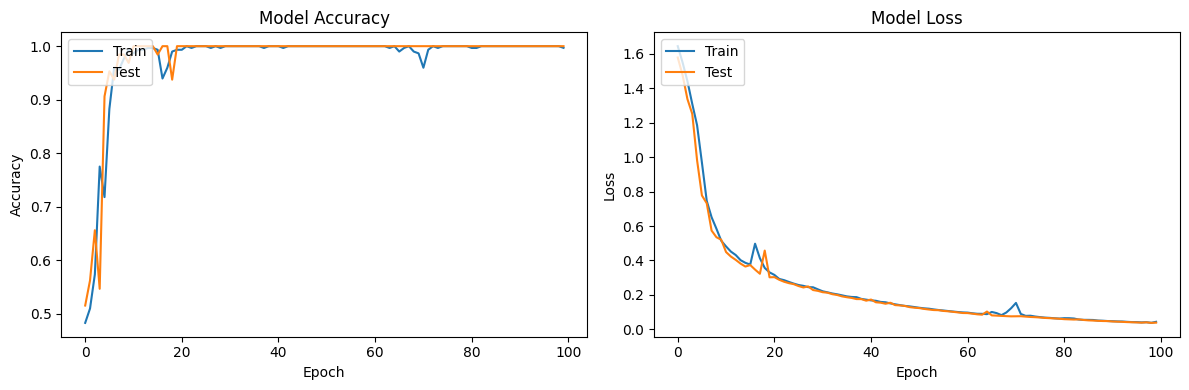

Model saved at: /content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration_1_with_augmentation_and_regularization


In [ ]:
# Iteration 1
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/train"
test_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with dropout and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Add L2 regularization
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(train_datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=100,  # Increase epochs
                    steps_per_epoch=len(train_data) // 32,
                    validation_data=test_datagen.flow(test_data, test_labels),
                    validation_steps=len(test_data) // 32,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration_1_with_augmentation_and_regularization"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the model
model.save(model_save_path)

print(f'Model saved at: {model_save_path}')


Class: Beef, Number of images: 160
Class: Mutton, Number of images: 170
Class: Beef, Number of images: 41
Class: Mutton, Number of images: 43
Epoch 1/100
10/10 [==============================] - 7s 527ms/step - loss: 0.7408 - accuracy: 0.5336 - val_loss: 68.6385 - val_accuracy: 0.4881
Epoch 2/100
10/10 [==============================] - 4s 413ms/step - loss: 0.6697 - accuracy: 0.5470 - val_loss: 38.7475 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 6s 543ms/step - loss: 0.5433 - accuracy: 0.7383 - val_loss: 12.8502 - val_accuracy: 0.7976
Epoch 4/100
10/10 [==============================] - 5s 490ms/step - loss: 0.4144 - accuracy: 0.8725 - val_loss: 14.7200 - val_accuracy: 0.8333
Epoch 5/100
10/10 [==============================] - 4s 398ms/step - loss: 0.2774 - accuracy: 0.9564 - val_loss: 19.1522 - val_accuracy: 0.8333
Epoch 6/100
10/10 [==============================] - 4s 404ms/step - loss: 0.1850 - accuracy: 0.9765 - val_loss: 18.7967 - val_accuracy: 0

CNN Test Accuracy: 0.7976190447807312
3/3 [==============================] - 0s 14ms/step


NameError: name 'dnn_model_save_path' is not defined

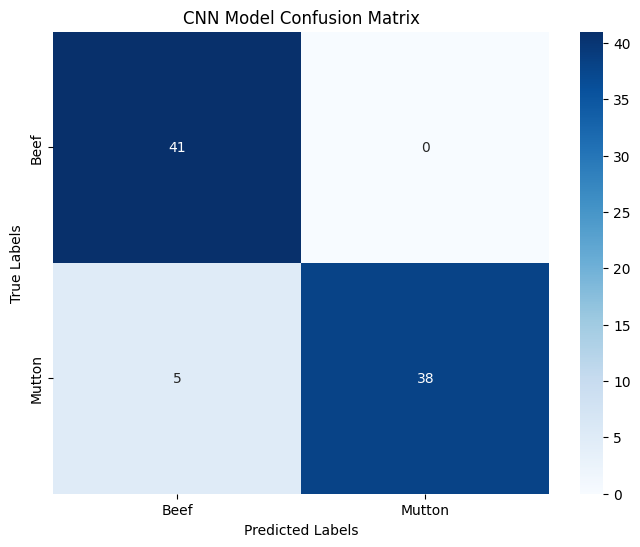

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/train"
test_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/test"

train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path)
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path)

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Create a data generator for the training set
train_generator = datagen.flow(train_data, train_labels, batch_size=32, shuffle=True)

# Get the number of classes based on the unique labels in the training set
num_classes = len(np.unique(label_encoder.inverse_transform(np.argmax(train_labels, axis=1))))

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_data) // 32,
    epochs=100,
    validation_data=(test_data, test_labels)
)

# Evaluate the CNN model on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_data, test_labels)
print(f'CNN Test Accuracy: {cnn_test_acc}')

# Make predictions on the test set using the CNN model
cnn_predictions = cnn_model.predict(test_data)
cnn_predicted_labels = np.argmax(dnn_predictions, axis=1)
cnn_true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix for DNN model
cnn_conf_matrix = confusion_matrix(cnn_true_labels, cnn_predicted_labels)

# Plot confusion matrix for DNN model
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot for DNN model
cnn_model_save_path = "/content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration 10 CNN"
# Create directories if they don't exist
os.makedirs(cnn_model_save_path, exist_ok=True)

cnn_conf_matrix_plot_path = os.path.join(dnn_model_save_path, "confusion_matrix_plot.png")
plt.savefig(cnn_conf_matrix_plot_path, dpi=300, bbox_inches='tight')

plt.show()

# Calculate precision, recall, and F1-score for DNN model
cnn_report = classification_report(cnn_true_labels, cnn_predicted_labels, target_names=label_encoder.classes_)
print("CNN Model Classification Report:")
print(cnn_report)

# Save evaluation metrics to a .txt file for DNN model
cnn_evaluation_file_path = os.path.join(cnn_model_save_path, "evaluation_metrics.txt")

# Ensure the directory exists before attempting to save the file
os.makedirs(os.path.dirname(dnn_evaluation_file_path), exist_ok=True)

with open(cnn_evaluation_file_path, "w") as file:
    file.write(f'CNN Test Accuracy: {cnn_test_acc}\n\n')
    file.write("CNN Confusion Matrix:\n")
    file.write(str(cnn_conf_matrix) + "\n\n")
    file.write("CNN Classification Report:\n")
    file.write(cnn_report + "\n\n")

print(f'CNN Evaluation metrics saved at: {cnn_evaluation_file_path}')

# Plot training history for DNN
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['accuracy'])
plt.plot(dnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(dnn_history.history['loss'])
plt.plot(dnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()

# Save the accuracy plot for DNN
cnn_accuracy_plot_path = os.path.join(cnn_model_save_path, "accuracy_plot.png")
plt.savefig(cnn_accuracy_plot_path, dpi=300, bbox_inches='tight')

plt.show()

# Save the DNN model
cnn_model.save(cnn_model_save_path)

print(f'CNN Model saved at: {cnn_model_save_path}')


Class: Beef, Number of images: 160
Class: Mutton, Number of images: 170
Class: Beef, Number of images: 41
Class: Mutton, Number of images: 43
Epoch 1/100
10/10 [==============================] - 7s 481ms/step - loss: 1.6501 - accuracy: 0.4899 - val_loss: 1.5928 - val_accuracy: 0.5469 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 4s 444ms/step - loss: 1.5504 - accuracy: 0.5101 - val_loss: 1.4777 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 6s 648ms/step - loss: 1.4349 - accuracy: 0.5570 - val_loss: 1.3602 - val_accuracy: 0.9219 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 5s 469ms/step - loss: 1.2794 - accuracy: 0.7312 - val_loss: 1.1196 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 5s 470ms/step - loss: 1.0515 - accuracy: 0.9362 - val_loss: 0.9239 - val_accuracy: 0.9062 - lr: 1.0000e-04
Epoch 6/100
10/10 [==============================] - 5s 48

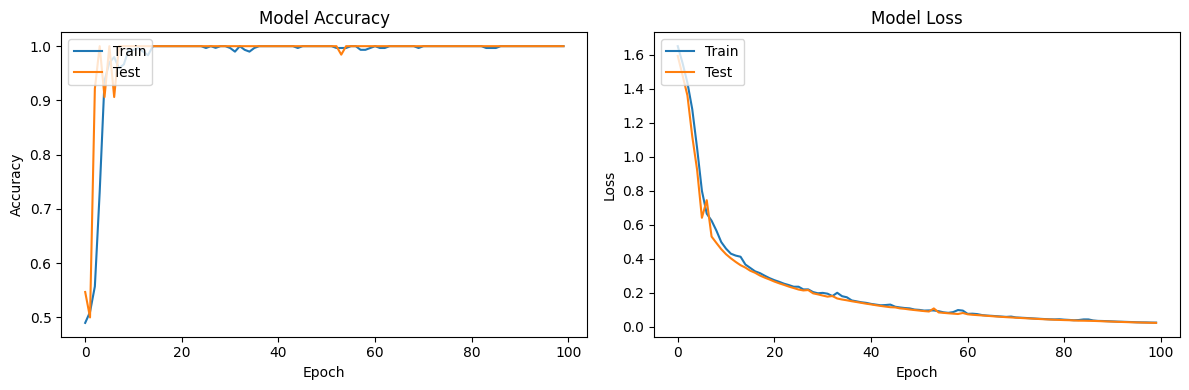

Model saved at: /content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration_1.3_with_augmentation_and_regularization


In [ ]:
# Iteration 1.3
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/train"
test_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with dropout and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Add L2 regularization
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(train_datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=100,  # Increase epochs
                    steps_per_epoch=len(train_data) // 32,
                    validation_data=test_datagen.flow(test_data, test_labels),
                    validation_steps=len(test_data) // 32,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration_1.3_with_augmentation_and_regularization"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the model
model.save(model_save_path)

print(f'Model saved at: {model_save_path}')


Class: Beef, Number of images: 160
Class: Mutton, Number of images: 170
Class: Beef, Number of images: 41
Class: Mutton, Number of images: 43
Epoch 1/100
10/10 [==============================] - 7s 536ms/step - loss: 1.6446 - accuracy: 0.5134 - val_loss: 1.5647 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 5s 467ms/step - loss: 1.5328 - accuracy: 0.5201 - val_loss: 1.4632 - val_accuracy: 0.4531 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 5s 476ms/step - loss: 1.4082 - accuracy: 0.6577 - val_loss: 1.2662 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 6s 607ms/step - loss: 1.1989 - accuracy: 0.8960 - val_loss: 0.9974 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 5s 540ms/step - loss: 0.9204 - accuracy: 0.9698 - val_loss: 0.7668 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/100
10/10 [==============================] - 4s 44

3/3 [==============================] - 0s 21ms/step
Confusion Matrix:
[[41  0]
 [25 18]]
Classification Report:
              precision    recall  f1-score   support

        Beef       0.62      1.00      0.77        41
      Mutton       1.00      0.42      0.59        43

    accuracy                           0.70        84
   macro avg       0.81      0.71      0.68        84
weighted avg       0.82      0.70      0.68        84

Evaluation metrics saved at: /content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration_1.4_with_augmentation_and_regularization/evaluation_metrics.txt


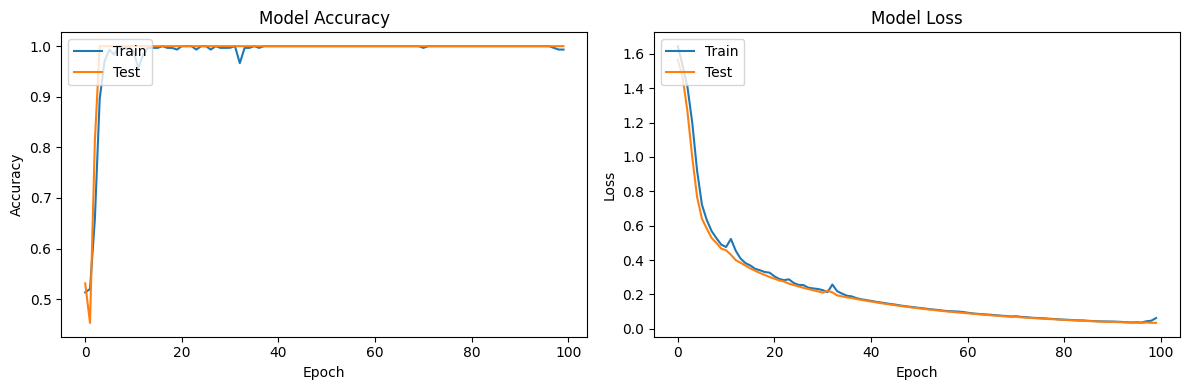

Model saved at: /content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration_1.4_with_augmentation_and_regularization


In [ ]:
# Iteration 1.4
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for class_folder in class_folders:
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/train"
test_dataset_path = "/content/drive/MyDrive/Meat Classification Split dataset/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path, image_size=(256, 256))
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path, image_size=(256, 256))

# Data augmentation using ImageDataGenerator with more aggressive parameters
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model architecture with dropout and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Add L2 regularization
model.add(layers.Dropout(0.5))  # Add dropout
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with a specified learning rate
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the augmented dataset with early stopping and reduced learning rate on plateau
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(train_datagen.flow(train_data, train_labels, batch_size=32),
                    epochs=100,  # Increase epochs
                    steps_per_epoch=len(train_data) // 32,
                    validation_data=test_datagen.flow(test_data, test_labels),
                    validation_steps=len(test_data) // 32,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_datagen.flow(test_data, test_labels))
print(f'Test Accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
model_save_path = "/content/drive/MyDrive/Trained model/Meat Classification/CNN/Iteration_1.4_with_augmentation_and_regularization"
evaluation_file_path = os.path.join(model_save_path, "evaluation_metrics.txt")

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

with open(evaluation_file_path, "w") as file:
    file.write(f'Test Accuracy: {test_acc}\n\n')
    file.write("Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("Classification Report:\n")
    file.write(report)

print(f'Evaluation metrics saved at: {evaluation_file_path}')


# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the model
model.save(model_save_path)

print(f'Model saved at: {model_save_path}')
